In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
from sklearn.impute import SimpleImputer

In [2]:
os.chdir("/content/Dataset")

In [3]:
files = os.listdir()
files.remove("Economics.pdf")
files.remove("ReadMe.pdf")
files.remove("Weather")

In [4]:
files

['Reference', 'TheAutomators', 'Digilog', 'Automatoes', 'AICU', 'IUACAAS']

In [5]:
LabAnalysis = {}
for i in files:
  filepath = os.path.join(i, "LabAnalysis.csv")
  LabAnalysis[i] = pd.read_csv(filepath)

In [6]:
LabAnalysis[files[0]].head()

,%Time,irr_PH,irr_EC,irr_NH4,irr_K,irr_Na,irr_Ca,irr_Mg,irr_Si,irr_NO3,...,drain_Cl,drain_SO4,drain_HCO3,drain_PO4,drain_Fe,drain_Mn,drain_Zn,drain_B,drain_Cu,drain_Mo
0,43836,4.3,5.1,1.1,15.1,0.3,9.7,5.0,0.09,21.8,...,10.7,17.4,1.2,2.00,32.7,7.1,6.1,69.0,1.1,0.66
1,43850,5.6,4.0,0.5,17.1,0.4,7.2,3.5,0.09,18.4,...,10.0,12.6,0.1,3.00,28.9,6.7,5.7,62.0,1.0,0.46
2,43864,5.4,3.9,0.5,18.1,0.3,7.5,3.6,0.09,17.7,...,9.8,12.3,0.5,3.20,23.2,6.4,7.7,66.0,0.7,0.72
3,43879,5.5,4.0,0.5,17.8,0.4,7.3,3.6,0.09,17.8,...,9.3,11.0,0.2,3.10,28.5,10.1,9.7,64.0,1.0,0.52
4,43893,5.5,3.7,0.5,14.5,0.4,6.5,3.0,0.01,16.3,...,6.7,8.9,0.1,2.65,27.0,8.1,9.1,52.0,1.1,0.50


In [7]:
si = SimpleImputer(strategy = "mean")
for i in files:
  column_names = LabAnalysis[i].columns
  values = LabAnalysis[i].values
  df = si.fit_transform(values)
  LabAnalysis[i] = pd.DataFrame(df, columns = column_names)

In [8]:
for i in range(len(files)):
  LabAnalysis[files[i]]['%Time'] = pd.to_datetime(LabAnalysis[files[i]]['%Time'], unit='D', origin='1899-12-30')

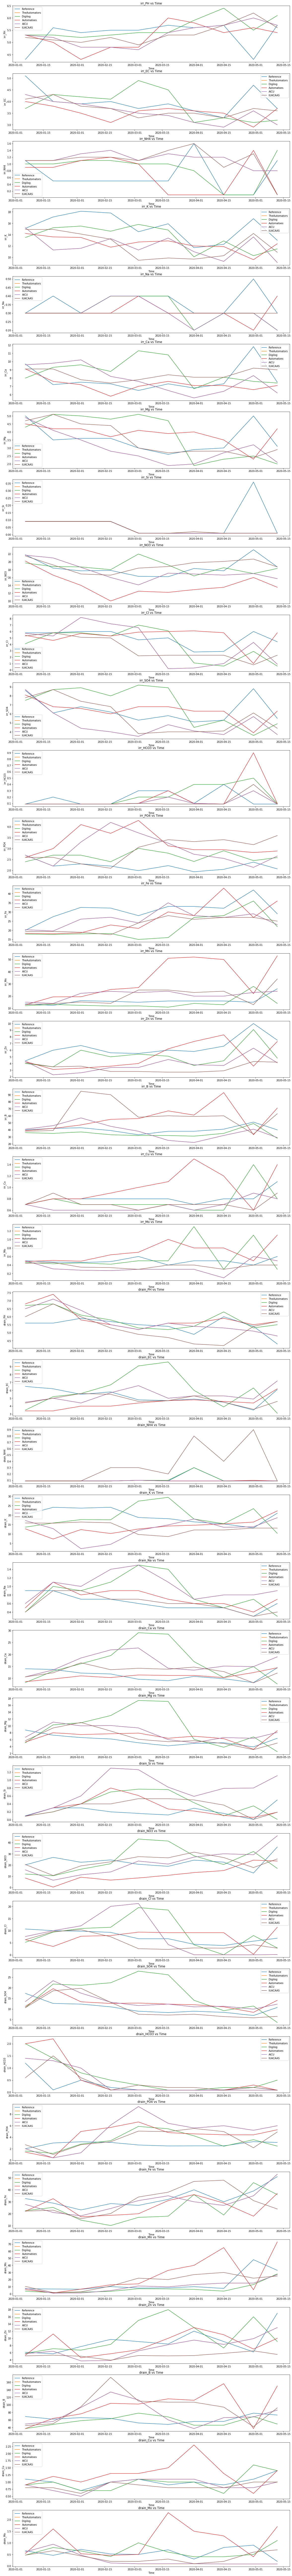

In [9]:
parameters = list(LabAnalysis[files[0]].columns)
parameters.remove("%Time")
plt.figure(figsize = (20, 200))
for paramnum, param in enumerate(parameters):
  plt.subplot(40, 1, paramnum + 1)
  for i in range(len(files)):
    plt.plot(LabAnalysis[files[i]]["%Time"], LabAnalysis[files[i]][param])
  plt.legend(files, loc = "best")
  plt.title(f"{param} vs Time")
  plt.xlabel("Time")
  plt.ylabel(f"{param}")
plt.show()